### 梯度上升与坐标上升可视化结果

P0:[-3.27  0.71], J=-22.893049999999995
P1:[-2.8575  0.027 ], J=-12.711239249999995
P2:[-2.5204   -0.328025], J=-8.718163752812497
P3:[-2.23476125 -0.50643375], J=-6.725563718435154
P4:[-1.98660681 -0.59027662], J=-5.467378598583159
P5:[-1.76745996 -0.62398248], J=-4.544674319236992
P6:[-1.57191309 -0.63156336], J=-3.8187329515447535
P7:[-1.39629995 -0.62595551], J=-3.2313011630058335
P8:[-1.23796773 -0.61409053], J=-2.750927755180892
P9:[-1.09487548 -0.59964818], J=-2.356595723695313
P10:[-0.96537034 -0.58455027], J=-2.032447250911918
P11:[-0.84806082 -0.56977117], J=-1.7658590313884965
P12:[-0.7417433  -0.55577718], J=-1.546570934072641
P13:[-0.64535783 -0.54276462], J=-1.3661791241439507
P14:[-0.55796028 -0.53078843], J=-1.2177809751032076
P15:[-0.47870367 -0.51983165], J=-1.0957012044971932
P16:[-0.40682489 -0.50984259], J=-0.995271959383236
P17:[-0.34163453 -0.50075467], J=-0.9126534893274442
P18:[-0.28250881 -0.49249679], J=-0.8446870901252685
P19:[-0.22888277 -0.48499868], J=-0.

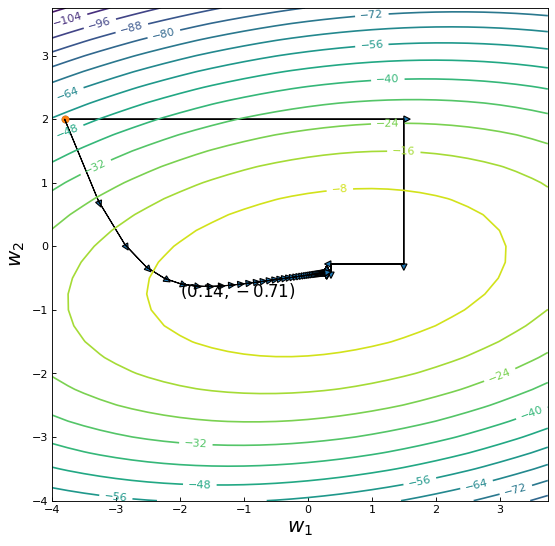

-0.5294117647058822


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f_grad2(W1, W2, descent=True):
    grad = -np.array([2. * W1 - W2 - 1, 9 * W2 - W1 + 4.])
    if descent:
        grad *= -1
    learning_rate = 0.05
    return learning_rate * grad


def cost(W1, W2):
    J = (1 / 2) * (W1 - 1) ** 2 + (2 * W2 + 1) ** 2 + (1 / 2) * (W1 - W2) ** 2
    return -J


def plot_countour():
    W1 = np.arange(-4, 4, 0.25)
    W2 = np.arange(-4, 4, 0.25)
    W1, W2 = np.meshgrid(W1, W2)
    plt.figure(figsize=(8, 8), dpi=80)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    J = cost(W1, W2)
    CS = plt.contour(W1, W2, J, 16)
    plt.clabel(CS, inline=2, fontsize=10)
    plt.annotate(r'$(0.14,-0.71)$', xy=(-2, -0.8), fontsize=15)
    plt.xlabel(r'$w_1$', fontsize=18)
    plt.ylabel(r'$w_2$', fontsize=18)

    # --------------  坐标下降算法
    p = np.array([-3.8, 2.])  # 起始位置
    q = np.array([0., 0.])  # 初始化
    plt.scatter(p[0], p[1])
    for i in range(50):
        q[0] = 0.5 * (p[1] + 1)
        plt.arrow(p[0], p[1], q[0] - p[0], 0., head_width=0.1, head_length=0.1, )
        p[0] = q[0]

        q[1] = (1 / 9.) * (p[0] - 4.)
        plt.arrow(p[0], p[1], 0., q[1] - p[1], head_width=0.1, head_length=0.1, )
        p[1] = q[1]

        # print("P{}:{}, J={}".format(i, p, cost(p[0], p[1])))
    #
    # # ------------  梯度下降算法
    p = np.array([-3.8, 2.])  # 起始位置
    plt.scatter(p[0], p[1])
    for i in range(50):  #
        q = f_grad2(p[0], p[1], descent=False)
        plt.arrow(p[0], p[1], q[0], q[1], head_width=0.1, head_length=0.1, )
        p += q  # 上一次的位置加上本次的梯度
        print("P{}:{}, J={}".format(i, p, cost(p[0], p[1])))
    plt.show()


if __name__ == '__main__':
    plot_countour()
    print(cost(5 / 17, -7 / 17))
